In [1]:
!pip install tensorflow -q

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/data/dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/data/dataset


In [43]:
import tensorflow as tf
import pathlib
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras

# 데이터 로드 및 전처리

In [45]:
categories = os.listdir()
num_labels = len(categories)

In [109]:
categories

['슬픔', '중립', '기쁨', '당황', '분노', '불안', '상처']

In [113]:
for label, cat in enumerate(categories): 
        class_num = label
        image_dir = cat + '/'
        print(class_num, image_dir)

0 슬픔/
1 중립/
2 기쁨/
3 당황/
4 분노/
5 불안/
6 상처/


In [139]:
image_w = 28
image_h = 28
  
X = []
Y = []
  
for idex, categorie in enumerate(categories):
    label = idex
    image_dir = categorie + '/'
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            img = cv2.imread(image_dir+filename) # cv2.IMREAD_GRAYSCALE : 흑백 처리
            img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
            X.append(img/256)
            Y.append(label)
 
X = np.array(X)
Y = np.array(Y)
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
xy = (X_train, X_test, Y_train, Y_test)

In [116]:
# 흑백 처리하면 사용

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [140]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1575, 28, 28, 3) (525, 28, 28, 3) (1575,) (525,)


In [141]:
train_input, val_input, train_target, val_target = train_test_split(X_train, Y_train, 
                                                                      test_size=0.2, random_state=42)

In [142]:
train_input.shape

(1260, 28, 28, 3)

In [143]:
val_input.shape

(315, 28, 28, 3)

In [144]:
train_target.shape

(1260,)

In [145]:
val_target.shape

(315,)

# 모델 제작 및 훈련

In [146]:
model = keras.Sequential() # 순서대로 구조 정의
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', 
                              padding = 'valid', input_shape = train_input.shape[1:]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_20 (Dense)            (None, 100)             

In [147]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights = True)

history = model.fit(train_input, train_target, epochs = 100,
                    validation_data = (val_input, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
40/40 [==============================] - 1s 27ms/step - loss: 2.1024 - accuracy: 0.1452 - val_loss: 1.9970 - val_accuracy: 0.1429
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 2.0173 - accuracy: 0.1349 - val_loss: 1.9726 - val_accuracy: 0.1460
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 1.9956 - accuracy: 0.1595 - val_loss: 1.9782 - val_accuracy: 0.1302
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 1.9835 - accuracy: 0.1659 - val_loss: 1.9528 - val_accuracy: 0.1651
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 1.9524 - accuracy: 0.1881 - val_loss: 1.9020 - val_accuracy: 0.1683
Epoch 6/100
40/40 [==============================] - 0s 6ms/step - loss: 1.8637 - accuracy: 0.2381 - val_loss: 1.8372 - val_accuracy: 0.2857
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 1.7878 - accuracy: 0.2865 - val_loss: 1.7461 - val_accuracy: 0.3079
Epoch 8/100


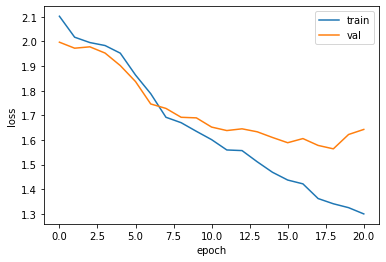

In [148]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [149]:
model.evaluate(val_input, val_target)

10/10 [==============================] - 0s 3ms/step - loss: 1.5638 - accuracy: 0.3841


[1.5638437271118164, 0.3841269910335541]